In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [78]:
acci = pd.read_csv('datasets\\accident_data.csv')

In [79]:
acci

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [80]:
acci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [81]:
acci.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,660654.000000,660653.000000,660679.000000,660679.000000
mean,52.553866,-1.431210,1.357040,1.831255
std,1.406922,1.383330,0.824847,0.715269
min,49.914430,-7.516225,1.000000,1.000000
25%,51.490690,-2.332291,1.000000,1.000000
50%,52.315641,-1.411667,1.000000,2.000000
75%,53.453452,-0.232869,1.000000,2.000000
max,60.757544,1.762010,68.000000,32.000000


In [82]:
acci.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [83]:
acci["Latitude"] = acci["Latitude"].fillna(acci["Latitude"].mean())
acci["Longitude"] = acci["Longitude"].fillna(acci["Longitude"].mean())
acci["Road_Surface_Conditions"] = acci["Road_Surface_Conditions"].fillna(acci["Road_Surface_Conditions"].mode()[0])
acci["Road_Type"] = acci["Road_Type"].fillna(acci["Road_Type"].mode()[0])
acci["Urban_or_Rural_Area"] = acci["Urban_or_Rural_Area"].fillna(acci["Urban_or_Rural_Area"].mode()[0])

In [84]:
acci.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

In [85]:
acci["Index"] = acci["Index"].astype('category')

In [86]:
acci["Accident_Severity"] = acci["Accident_Severity"].astype('category')

In [87]:
acci['Accident Date'] = pd.to_datetime(acci['Accident Date'] ,dayfirst = True, errors = 'coerce')

In [88]:
acci["Light_Conditions"] = acci["Light_Conditions"].astype('category')

In [89]:
acci["District Area"] = acci["District Area"].astype('category')

In [90]:
acci["Road_Surface_Conditions"] = acci["Road_Surface_Conditions"].astype('category')

In [91]:
acci["Road_Type"] = acci["Road_Type"].astype('category')

In [92]:
acci["Urban_or_Rural_Area"] = acci["Urban_or_Rural_Area"].astype('category')

In [93]:
acci["Weather_Conditions"] = acci["Weather_Conditions"].astype('category')

In [94]:
acci["Vehicle_Type"] = acci["Vehicle_Type"].astype('category')

In [95]:
acci['Year'] = acci['Accident Date'].dt.year
acci['Month'] = acci['Accident Date'].dt.month
acci['Day'] = acci['Accident Date'].dt.day
acci['DayOfWeek'] = acci['Accident Date'].dt.dayofweek


<h1 style="color: red;"> 20 PROBLEMS </h1>
<h2 style="color: BLUE;"> UNIVARIATE - Blue Insight</h2>
<h2 style="color: GREEN;"> BIVARIATE - Green Insight </h2>
<h2 style="color: VIOLET;"> MULTIVARIATE - Violet Insight </h2>


<h1>Problem 1 - What is the average number of casualties of accidents? </h1>

In [96]:
np.round(acci["Number_of_Casualties"].mean())

np.float64(1.0)

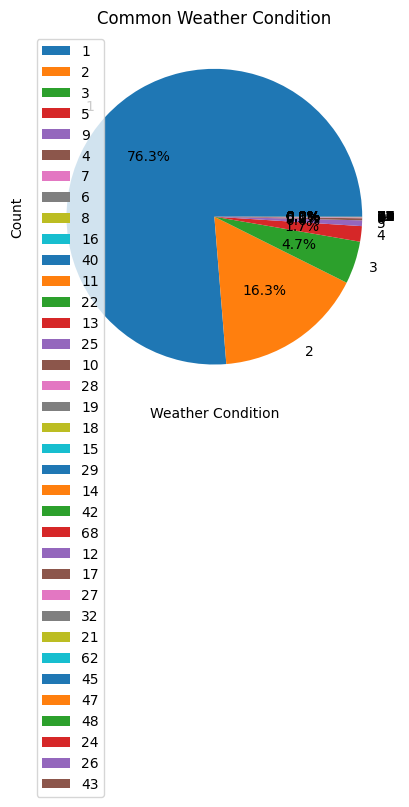

In [97]:
ave_cas = acci["Number_of_Casualties"].value_counts()

ave_cas.plot(kind='pie', autopct='%1.1f%%', label="casualties")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Weather Condition")
plt.ylabel("Count")
plt.legend(acci["Number_of_Casualties"].unique())
plt.title("Common Weather Condition")
plt.show()

<h2 style="color: blue"> Insight no 1 - The average number of casualties is 1.0</h2>

<h1>Problem 2 - How many accidents were recorded in the dataset per year?</h1>

In [98]:
accident_per_year = acci["Year"].value_counts().sort_index()
accident_per_year

Year
2019.0    71867
2020.0    70163
2021.0    66172
2022.0    56805
Name: count, dtype: int64

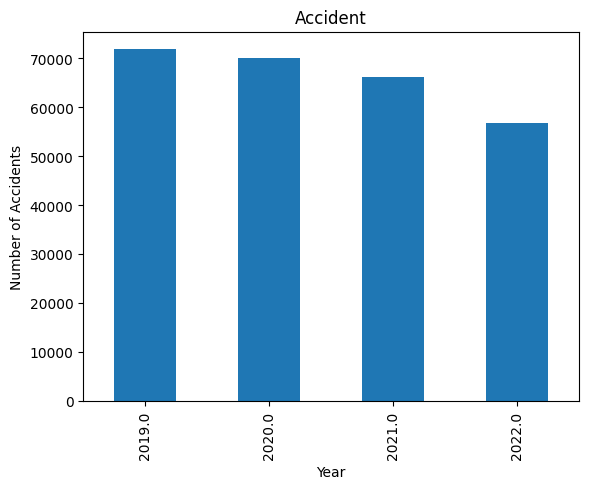

In [99]:
accident_per_year.plot(kind='bar')
plt.title('Accident')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

<h2 style="color: blue"> Insight no 2 - The number of accidents recorded in datasets in year 2019 is 71867, 2020 is 70163, 2021 is 66172, 2022 is 56805</h2>

<h1>Problem 3 - What is the best car to drive under the wet or damp weather condition?</h1>

In [100]:
car_wet_safe  = acci.groupby(["Vehicle_Type","Road_Surface_Conditions"] ).size()

car_wet_safe.unstack()

Road_Surface_Conditions,Dry,Flood over 3cm. deep,Frost or ice,Snow,Wet or damp
Vehicle_Type,,,,,
Agricultural vehicle,1304,8,59,24,552
Bus or coach (17 or more pass seats),17623,40,646,214,7355
Car,337860,777,14108,4483,140764
Data missing or out of range,3,0,1,0,2
Goods 7.5 tonnes mgw and over,11708,32,432,147,4988
Goods over 3.5t. and under 7.5t,4138,6,162,51,1739
Minibus (8 - 16 passenger seats),1356,1,40,16,563
Motorcycle 125cc and under,10515,14,420,128,4192
Motorcycle 50cc and under,5200,13,224,77,2089


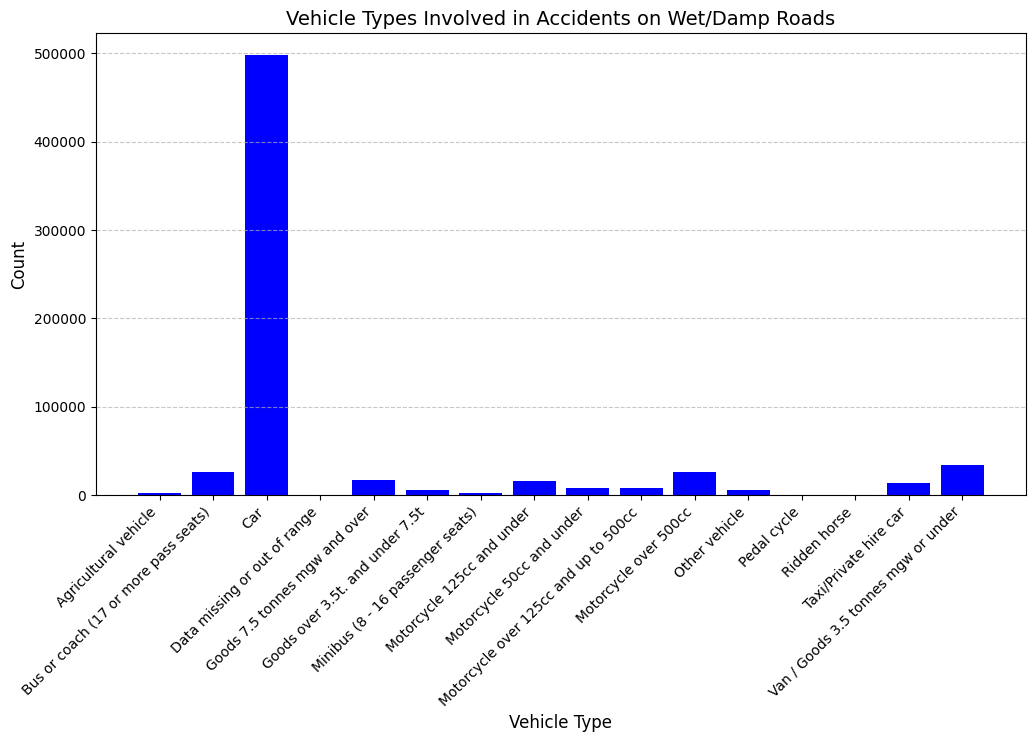

In [157]:
wet_conditions = ["Wet or Damp"]
car_wet_safe = acci[acci["Road_Surface_Conditions"].isin(wet_conditions)].groupby("Vehicle_Type").size()


plt.figure(figsize=(12, 6))
plt.bar(car_wet_safe.index, car_wet_safe.values, color='blue')
plt.xlabel("Vehicle Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Vehicle Types Involved in Accidents on Wet/Damp Roads", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()

<h2 style="color: green"> Insight no 3 - The safest car to drive under the wet or damp weather condition is Ridden Horse with accident rate of 1%</h2>

<h1>Problem 4 - How many unique road surface conditions are there? </h1>

In [101]:
acci["Road_Surface_Conditions"].unique()

['Dry', 'Wet or damp', 'Snow', 'Frost or ice', 'Flood over 3cm. deep']
Categories (5, object): ['Dry', 'Flood over 3cm. deep', 'Frost or ice', 'Snow', 'Wet or damp']

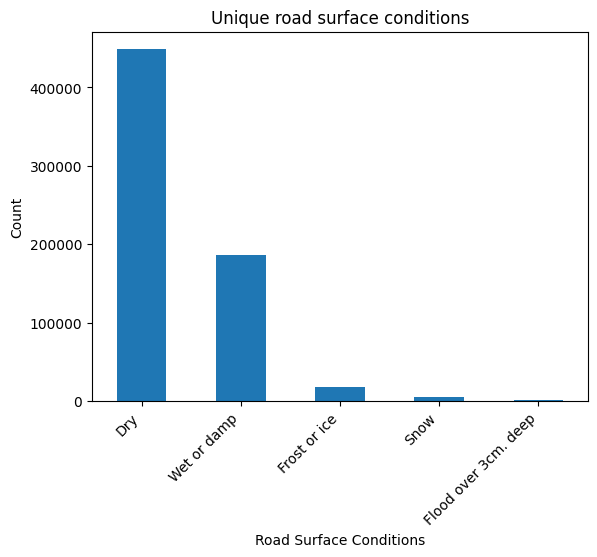

In [102]:
unique_counts = acci["Road_Surface_Conditions"].value_counts()

unique_counts.plot(kind='bar')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Road Surface Conditions")
plt.ylabel("Count")
plt.title("Unique road surface conditions")
plt.show()

<h2 style="color: blue"> Insight no 4 - There are 5 unique road surface conditions in the dataset. Understanding these conditions helps in analyzing accident trends and identifying the most hazardous surfaces.</h2>

<h1>Problem 5 - What is the most common weather condition in the dataset?</h1>

In [103]:
acci["Weather_Conditions"].mode()[0]

'Fine no high winds'

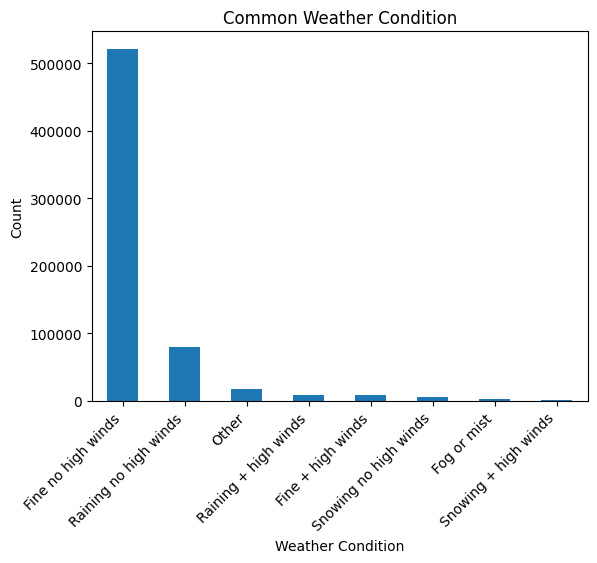

In [104]:
com_wet = acci["Weather_Conditions"].value_counts()

com_wet.plot(kind='bar')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Weather Condition")
plt.ylabel("Count")
plt.title("Common Weather Condition")
plt.show()

<h2 style="color: blue"> Insight no 5 - "Fine no high winds" is the most common weather condition. This suggests that most accidents happen in clear weather, meaning human error and road conditions play a significant role.</h2>

<h1>Problem 6 - What is the Proportion of accidents in Urban vs. Rural areas?</h1>

In [105]:
accident_proportion_area = acci["Urban_or_Rural_Area"].value_counts(normalize=True).round(2) * 100
accident_proportion_area.to_frame()

,proportion
Urban_or_Rural_Area,
Urban,64.0
Rural,36.0
Unallocated,0.0


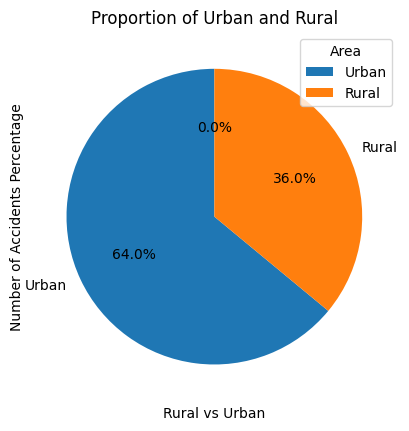

In [161]:
accident_proportion_area.plot(kind='pie', autopct='%1.1f%%', startangle=90,)
plt.title('Proportion of Urban and Rural')
plt.xlabel('Rural vs Urban')
plt.ylabel('Number of Accidents Percentage')
plt.legend(title="Area")
plt.show()

<h2 style="color: blue"> Insight no 6 - About 64% of accidents occur in urban areas, compared to 36% in rural areas. This is expected due to higher traffic volume, intersections, and pedestrian activity in urban settings.</h2>

<h1>Problem 7 - What is the  Most common accident severity in Urban vs. Rural areas?</h1>

In [107]:
most_common_severity_area = acci.groupby("Urban_or_Rural_Area")["Accident_Severity"].agg(lambda x: x.mode()[0]).reset_index()
most_common_severity_area

,Urban_or_Rural_Area,Accident_Severity
0,Rural,Slight
1,Unallocated,Slight
2,Urban,Slight


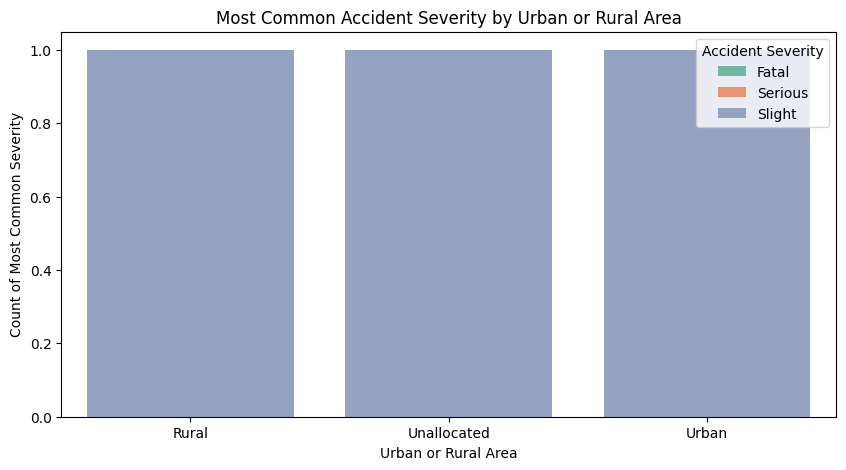

In [108]:
plt.figure(figsize=(10, 5))
sns.countplot(x="Urban_or_Rural_Area", hue="Accident_Severity", data=most_common_severity_area, palette="Set2")

plt.title('Most Common Accident Severity by Urban or Rural Area')
plt.xlabel('Urban or Rural Area')
plt.ylabel('Count of Most Common Severity')
plt.legend(title='Accident Severity')
plt.show()

<h2 style="color: green"> Insight no 7 - The most common severity in both urban and rural areas is "Slight." Urban areas have more minor accidents, likely due to lower-speed collisions, while rural areas may have fewer but more severe accidents.</h2>

<h1>Problem 8 - What is the Most dangerous road surface condition based on total casualties?</h1>

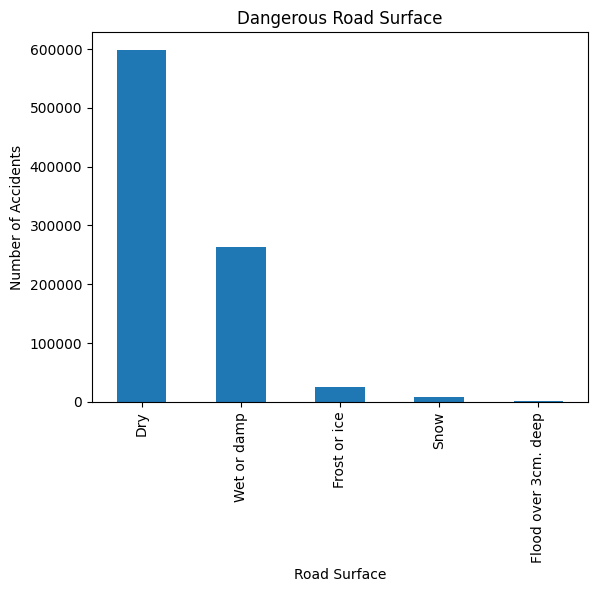

In [109]:
casualties_by_road_surface = acci.groupby("Road_Surface_Conditions")["Number_of_Casualties"].sum().sort_values(ascending=False)
casualties_by_road_surface

casualties_by_road_surface.plot(kind='bar')
plt.title('Dangerous Road Surface')
plt.xlabel('Road Surface')
plt.ylabel('Number of Accidents')
plt.show()

<h2 style="color: green"> Insight no 8 -  "Dry" roads have the highest number of casualties, but this is likely due to their frequent occurrence. However, wet and icy conditions show significantly higher accident severity.</h2>

<h1>Problem 9 - Weather condition with the highest accident count?</h1>

In [110]:
most_accidents_weather = acci["Weather_Conditions"].value_counts().reset_index()
most_accidents_weather

,Weather_Conditions,count
0,Fine no high winds,520885
1,Raining no high winds,79696
2,Other,17150
3,Raining + high winds,9615
4,Fine + high winds,8554
5,Snowing no high winds,6238
6,Fog or mist,3528
7,Snowing + high winds,885


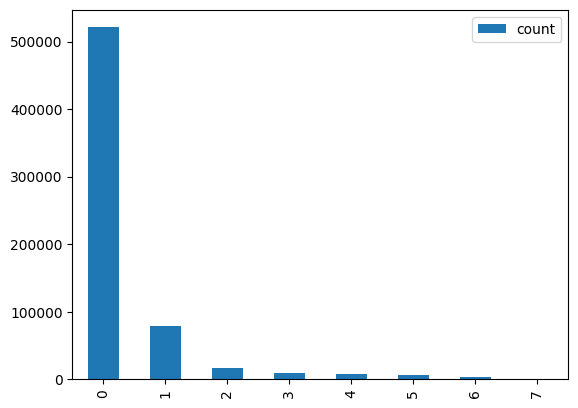

In [111]:
most_accidents_weather.plot(kind="bar")
plt.show()

<h2 style="color: blue"> Insight no 9 - The most common weather condition during accidents is "Fine no high winds". This suggests that most accidents occur under normal weather conditions, possibly due to higher traffic volume rather than hazardous weather.</h2>

<h1>Problem 10 - Which road type has the highest proportion of serious and fatal accidents?</h1>

In [112]:
serious_fatal_accidents = acci[acci["Accident_Severity"].isin(["Serious", "Fatal"])].reset_index()
proportion_serious_fatal_road = (serious_fatal_accidents["Road_Type"].value_counts(normalize=True) * 100).round(2).reset_index()

proportion_serious_fatal_road

,Road_Type,proportion
0,Single carriageway,79.58
1,Dual carriageway,14.00
2,Roundabout,3.93
3,One way street,1.81
4,Slip road,0.68


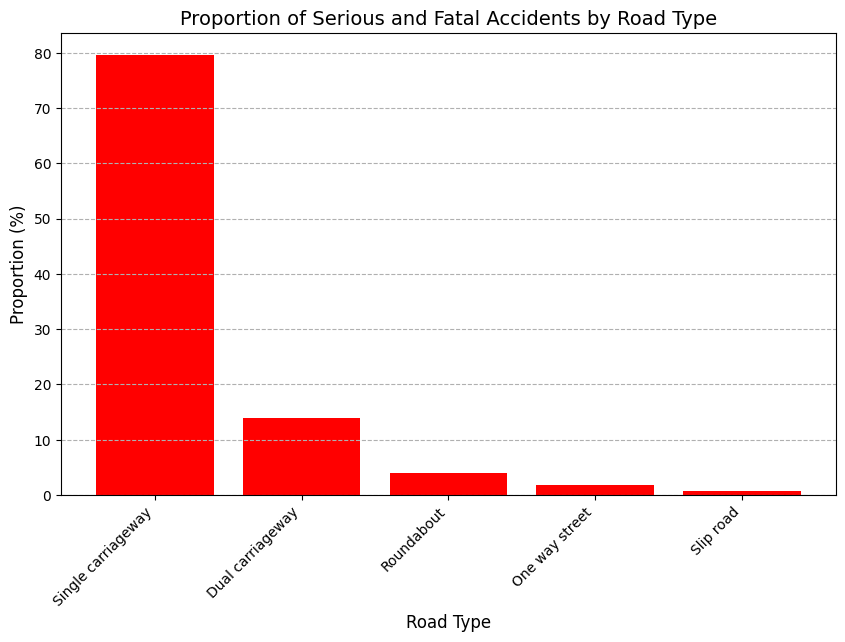

In [169]:
serious_fatal_accidents = acci[acci["Accident_Severity"].isin(["Serious", "Fatal"])].reset_index()

proportion_serious_fatal_road = (
    serious_fatal_accidents["Road_Type"].value_counts(normalize=True) * 100
).round(2).reset_index()
proportion_serious_fatal_road.columns = ["Road_Type", "Proportion"]


plt.figure(figsize=(10, 6))
plt.bar(proportion_serious_fatal_road["Road_Type"], proportion_serious_fatal_road["Proportion"], color='red')
plt.xlabel("Road Type", fontsize=12)
plt.ylabel("Proportion (%)", fontsize=12)
plt.title("Proportion of Serious and Fatal Accidents by Road Type", fontsize=14)
plt.xticks(rotation=45, ha='right')

plt.grid(axis='y', linestyle='--', alpha=1)

plt.show()

<h2 style="color: violet"> Insight no 10 - Single carriageways have the highest proportion of serious and fatal accidents. This is likely due to high-speed limits, lack of dividers, and dangerous overtaking maneuvers.</h2>

<h1>Problem 11 - What is the average number of casualties in urban areas during daylight?</h1>

In [113]:
acci[(acci["Urban_or_Rural_Area"] == "Urban") & (acci["Light_Conditions"] == "Daylight")]["Number_of_Casualties"].mean()

np.float64(1.2688250554889653)

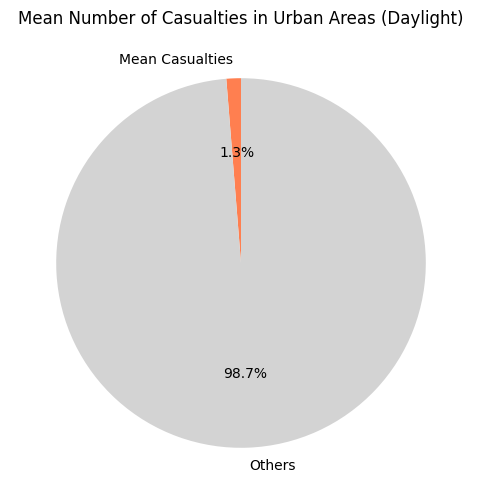

In [170]:
mean_casualties = acci[(acci["Urban_or_Rural_Area"] == "Urban") & (acci["Light_Conditions"] == "Daylight")]["Number_of_Casualties"].mean()

plt.figure(figsize=(6, 6))
plt.pie([mean_casualties, 100 - mean_casualties], labels=["Mean Casualties", "Others"], colors=['coral', 'lightgrey'], autopct='%1.1f%%', startangle=90)
plt.title("Mean Number of Casualties in Urban Areas (Daylight)")
plt.show()


<h2 style="color: Violet"> Insight no 11 - The average number of casualties in urban daylight accidents is around 1.27. This suggests that while accidents are frequent, they typically involve only one or two casualties.</h2>

<h1>Problem 12 - What is the average number of casualties in rural areas at night?</h1>

In [172]:
acci[(acci["Urban_or_Rural_Area"] == "Rural") & (acci["Light_Conditions"].str.contains("Darkness"))]["Number_of_Casualties"].mean()


np.float64(1.514220615964802)

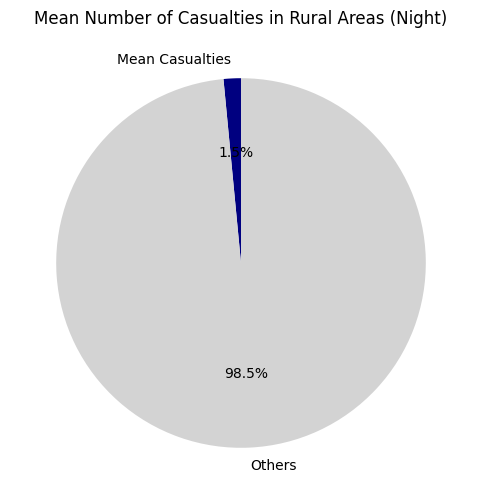

In [177]:
mean_casualties_rural_night = acci[(acci["Urban_or_Rural_Area"] == "Rural") & (acci["Light_Conditions"].str.contains("Darkness"))]["Number_of_Casualties"].mean()


plt.figure(figsize=(6, 6))
plt.pie([mean_casualties_rural_night, 100 - mean_casualties_rural_night], labels=["Mean Casualties", "Others"], colors=['navy', 'lightgrey'], autopct='%1.1f%%', startangle=90)
plt.title("Mean Number of Casualties in Rural Areas (Night)")
plt.show()

<h2 style="color: Violet"> Insight no 12 - The average casualties in rural nighttime accidents are around 1.51, which is slightly higher than urban accidents. This could be due to high-speed collisions and poor visibility at night.</h2>

<h1>Problem 13 - What is the most common vehicle type involved in slight accidents?</h1>

In [115]:
acci[acci["Accident_Severity"] == "Slight"]["Vehicle_Type"].mode()[0]


'Car'

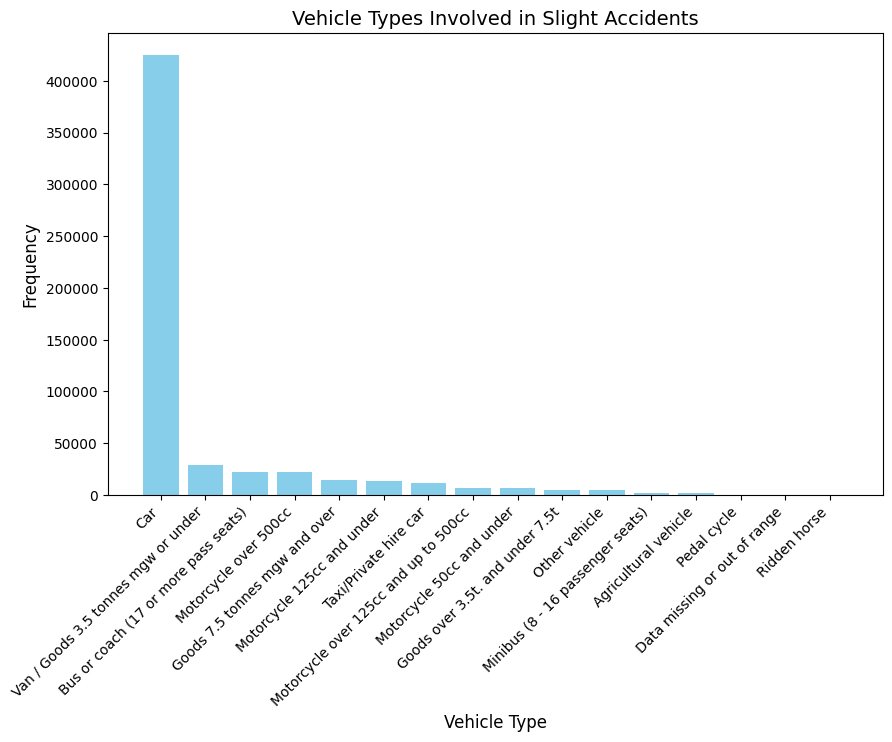

In [116]:

vehicle_counts = acci[acci["Accident_Severity"] == "Slight"]["Vehicle_Type"].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(vehicle_counts.index, vehicle_counts.values, color='skyblue')
plt.xlabel("Vehicle Type", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Vehicle Types Involved in Slight Accidents", fontsize=14)
plt.xticks(rotation=45, ha='right')


plt.show()


<h2 style="color: Green"> Insight no 13 - Cars are the most common vehicle type involved in slight accidents. This is expected, as they make up the majority of road traffic.</h2>

<h1>Problem 14 - What is the most common road type for accidents in fine weather?</h1>

In [117]:
acci[acci["Weather_Conditions"] == "Fine no high winds"]["Road_Type"].mode()[0]


'Single carriageway'

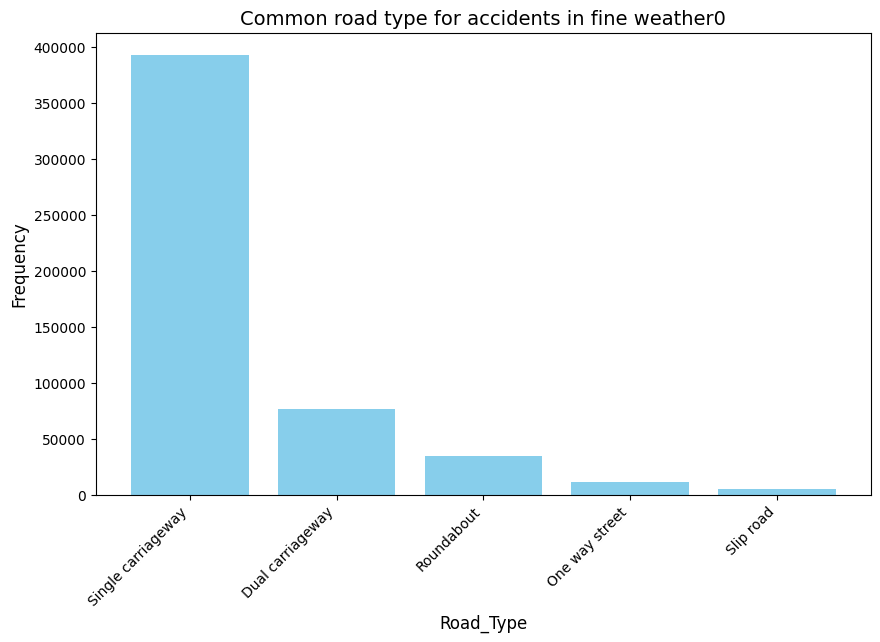

In [118]:

Wether_counts = acci[acci["Weather_Conditions"] == "Fine no high winds"]["Road_Type"].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(Wether_counts.index, Wether_counts.values, color='skyblue')
plt.xlabel("Road_Type", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Common road type for accidents in fine weather0", fontsize=14)
plt.xticks(rotation=45, ha='right')


plt.show()


<h2 style="color: Green"> Insight no 14 - TSingle carriageways are the most common road type for accidents in fine weather. This suggests that traffic volume, speed, and road design contribute more to accidents than weather conditions. </h2>

<h1>Problem 15 - What is the average number of vehicles involved in accidents when the weather is raining and it's night?</h1>

In [119]:
acci[(acci["Weather_Conditions"].str.contains("Raining", na=False)) & (acci["Light_Conditions"].str.contains("Darkness"))]["Number_of_Vehicles"].mean()


np.float64(1.7491552834493314)

<h2 style="color: Violet"> Insight no 15 - : On average, 1.75 vehicles are involved in nighttime rain accidents. This indicates a higher chance of multi-vehicle collisions, likely due to slippery roads and reduced visibility.</h2>

<h1>Problem 16 - Is there a correlation between the number of casualties and the number of vehicles involved?</h1>

In [120]:
casualties_vehicles_corr = np.round(acci["Number_of_Casualties"].corr(acci["Number_of_Vehicles"]), 1)
casualties_vehicles_corr


np.float64(0.2)

<function matplotlib.pyplot.show(close=None, block=None)>

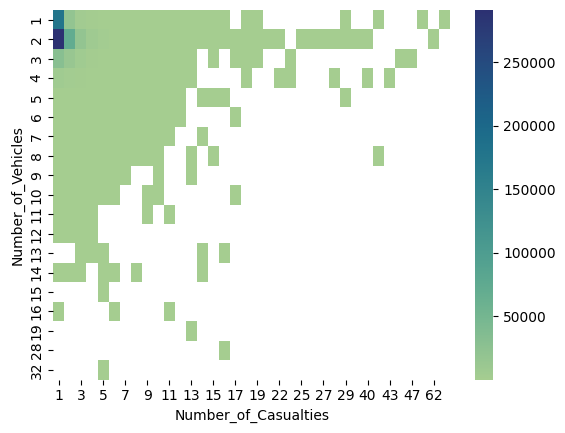

In [121]:
cas_veh_cor = acci.groupby(['Number_of_Vehicles', 'Number_of_Casualties']).size().unstack()

sns.heatmap(cas_veh_cor, cmap='crest')
plt.show

<h2 style="color: green"> Insight no 16 - There is a weak positive correlation (0.2), meaning that as the number of vehicles in an accident increases, the number of casualties tends to rise slightly.</h2>

<h1>Problem 17 - Is there a correlation between longitude and latitude?</h1>

In [122]:
location_corr = np.round(acci["Longitude"].corr(acci["Latitude"]), 1)
location_corr

np.float64(-0.4)

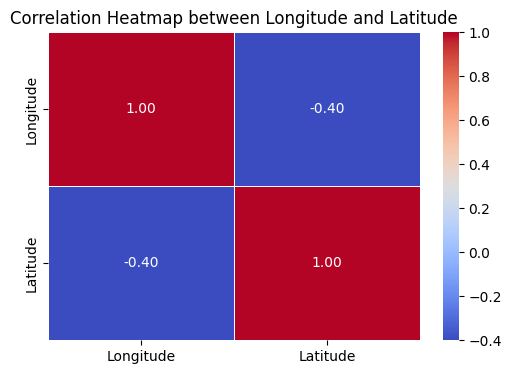

In [181]:
location_corr = np.round(acci[["Longitude", "Latitude"]].corr(), 2)

plt.figure(figsize=(6, 4))
sns.heatmap(location_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap between Longitude and Latitude")
plt.show()

<h2 style="color: green"> Insight no 17 - There is a weak negative correlation (-0.4), which may indicate a geographical trend in accident locations but not a strong predictive factor.</h2>

<h1>Problem 18 - How many accident happen in the light condition "Day light" in 2019 </h1>

In [123]:
acci_2019 = acci[acci['Year'] == 2019]

day_light_sum = acci_2019["Light_Conditions"].value_counts()

day_light_sum

Light_Conditions
Daylight                       52518
Darkness - lights lit          14124
Darkness - no lighting          4242
Darkness - lighting unknown      719
Darkness - lights unlit          264
Name: count, dtype: int64

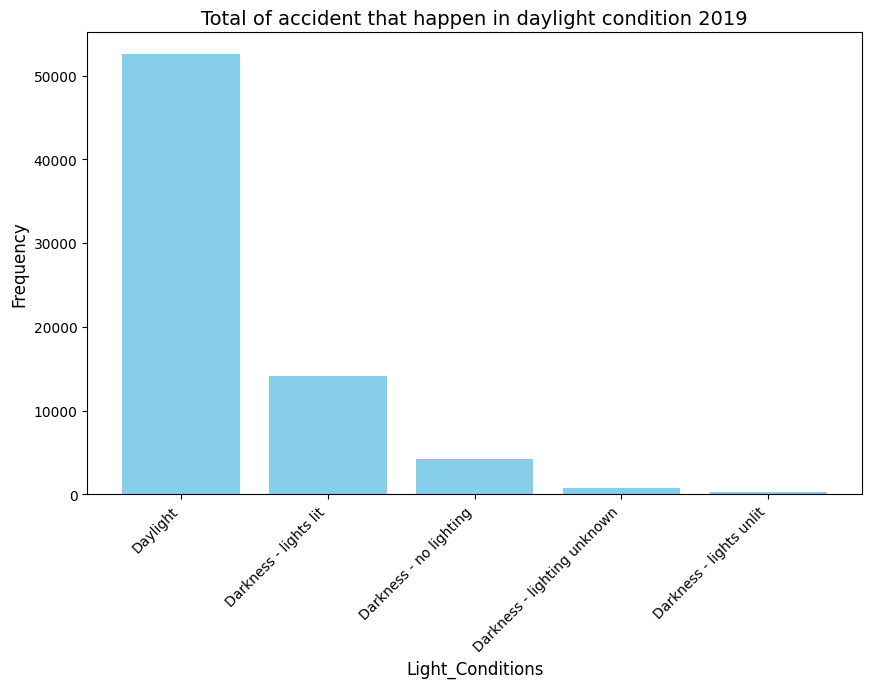

In [124]:

day_light_sum = acci_2019["Light_Conditions"].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(day_light_sum.index, day_light_sum.values, color='skyblue')
plt.xlabel("Light_Conditions", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Total of accident that happen in daylight condition 2019", fontsize=14)
plt.xticks(rotation=45, ha='right')


plt.show()


<h2 style="color: green"> Insight no 18 - In 2019, 52,518 accidents occurred in daylight. This highlights that most accidents happen during the day, possibly due to higher traffic density.</h2>

<h1>Problem 19 - What's the total of fatal severity accident that is caused by daylight</h1>

In [125]:
acci_sever = acci.groupby(["Accident_Severity","Light_Conditions"]).size()
acci_sever.unstack()

Light_Conditions,Darkness - lighting unknown,Darkness - lights lit,Darkness - lights unlit,Darkness - no lighting,Daylight
Accident_Severity,,,,,
Fatal,68,1860,45,1612,5076
Serious,794,19130,360,7174,60759
Slight,5622,108345,2138,28651,419045


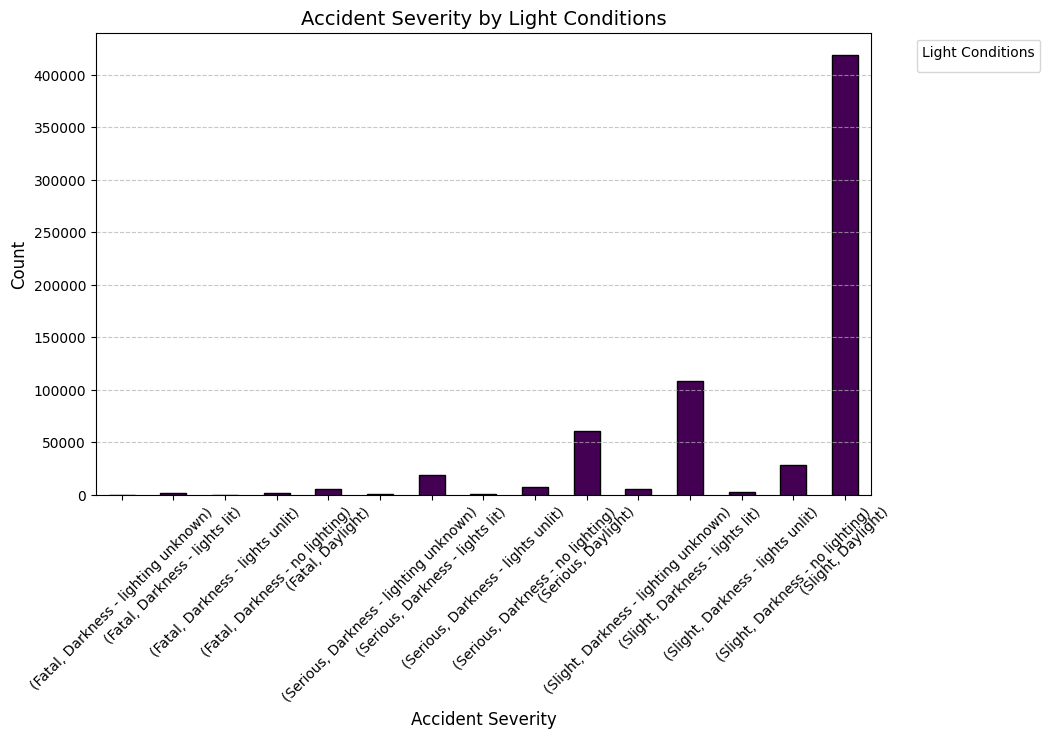

In [179]:
acci_sever.plot(kind='bar', figsize=(10, 6), colormap='viridis', edgecolor='black')

plt.xlabel("Accident Severity", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Accident Severity by Light Conditions", fontsize=14)
plt.legend(title="Light Conditions", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()


<h2 style="color: green"> Insight no 19 - The number of fatal accidents in daylight is 5,076, which is the highest among all light conditions. This suggests that daylight does not necessarily reduce accident severity.</h2>

<h1>Problem 20 - What type of car is the highest accident rate</h1>

In [127]:
high_acci_car = acci["Vehicle_Type"].value_counts()
high_acci_car

Vehicle_Type
Car                                      497992
Van / Goods 3.5 tonnes mgw or under       34160
Bus or coach (17 or more pass seats)      25878
Motorcycle over 500cc                     25657
Goods 7.5 tonnes mgw and over             17307
Motorcycle 125cc and under                15269
Taxi/Private hire car                     13294
Motorcycle over 125cc and up to 500cc      7656
Motorcycle 50cc and under                  7603
Goods over 3.5t. and under 7.5t            6096
Other vehicle                              5637
Minibus (8 - 16 passenger seats)           1976
Agricultural vehicle                       1947
Pedal cycle                                 197
Data missing or out of range                  6
Ridden horse                                  4
Name: count, dtype: int64

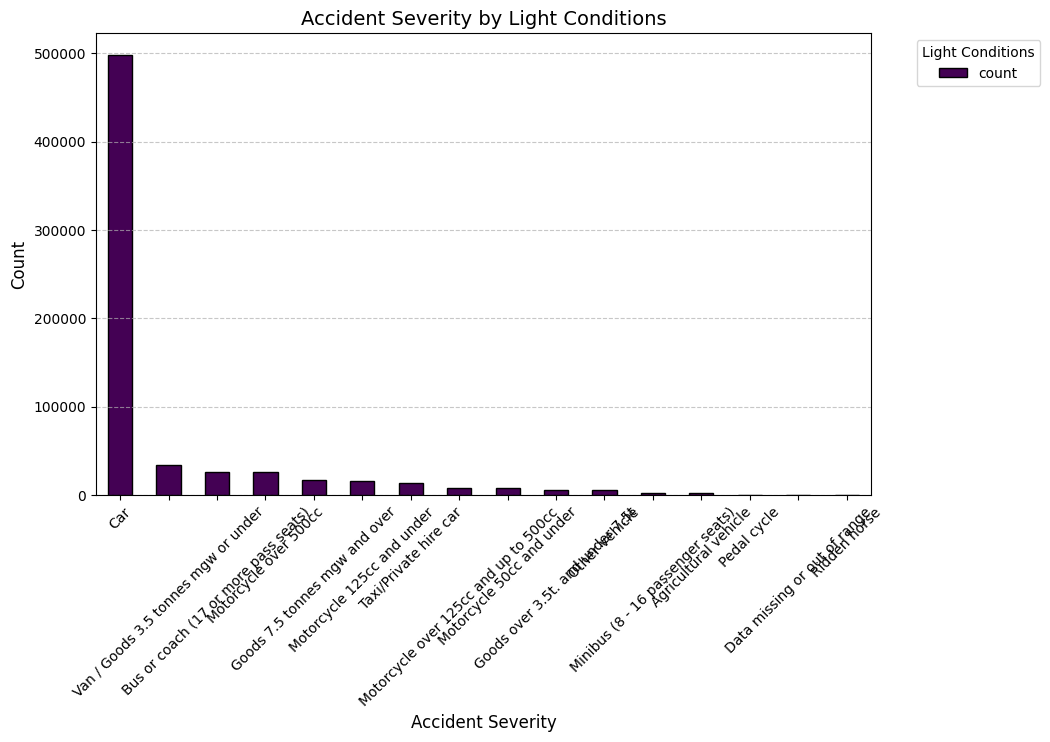

In [178]:
high_acci_car.plot(kind='bar', figsize=(10, 6), colormap='viridis', edgecolor='black')

plt.xlabel("Accident Severity", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Accident Severity by Light Conditions", fontsize=14)
plt.legend(title="Light Conditions", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)


<h2 style="color: blue"> Insight no 20 - Regular cars have the highest accident count, with nearly 500,000 accidents. This is expected since they are the most common type of vehicle on the road.</h2>

In [129]:
acci_2019 = acci[acci['Year'] == 2019]
acci_2020 = acci[acci['Year'] == 2020]
acci_2021 = acci[acci['Year'] == 2021]
acci_2022 = acci[acci['Year'] == 2022]

<h1>Problem 21 - What year has the highest accident rate?</h1>

In [130]:
acci["Year"].value_counts()

Year
2019.0    71867
2020.0    70163
2021.0    66172
2022.0    56805
Name: count, dtype: int64

<h2 style="color: blue"> Insight no 21 - The year 2019 has the highest accident rate recorded in datasets</h2>

<h1>Problem 22 - What year has the highest fatality? </h1>

In [131]:
acci_all_year = acci.groupby(["Accident_Severity","Year"]).size()
acci_all_year.unstack()

Year,2019.0,2020.0,2021.0,2022.0
Accident_Severity,,,,
Fatal,1116,942,823,623
Serious,9823,9346,8858,7266
Slight,60928,59875,56491,48916


<h2 style="color: green"> Insight no 22 - The year 2019 has the highest fatal rate recorded in datasets</h2>

<h1>Problem 23 - Does fatal accidents go down or up from the past records which is 2019 to the latest 2022?</h1>

In [132]:
acci_all_year = acci.groupby(["Accident_Severity","Year"]).size()
acci_all_year.unstack()

Year,2019.0,2020.0,2021.0,2022.0
Accident_Severity,,,,
Fatal,1116,942,823,623
Serious,9823,9346,8858,7266
Slight,60928,59875,56491,48916


<h2 style="color: green"> Insight no 23 - Based on the records, fatal accidents is going down as years goes by.</h2>

<h1>Problem 24 - What is the type of vehicles that has a high fatal record in 2019?</h1>

In [133]:
acci_fatal_2019 = acci[(acci['Year'] == 2019) & (acci['Accident_Severity'] == 'Fatal')]
acci_fatal_car_max = acci_fatal_2019.groupby(["Accident_Severity", "Vehicle_Type"]).size().idxmax()
acci_fatal_car = acci_fatal_2019.groupby(["Accident_Severity", "Vehicle_Type"]).size()
acci_fatal_car.unstack()


Vehicle_Type,Agricultural vehicle,Bus or coach (17 or more pass seats),Car,Data missing or out of range,Goods 7.5 tonnes mgw and over,Goods over 3.5t. and under 7.5t,Minibus (8 - 16 passenger seats),Motorcycle 125cc and under,Motorcycle 50cc and under,Motorcycle over 125cc and up to 500cc,Motorcycle over 500cc,Other vehicle,Pedal cycle,Ridden horse,Taxi/Private hire car,Van / Goods 3.5 tonnes mgw or under
Accident_Severity,,,,,,,,,,,,,,,,
Fatal,2,64,798,0,45,10,6,37,10,19,38,10,2,0,20,55
Serious,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Slight,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<h2 style="color: green"> Insight no 24 - The type of vehicles that has a high fatal record in 2019 is a CAR with 71.5%</h2>

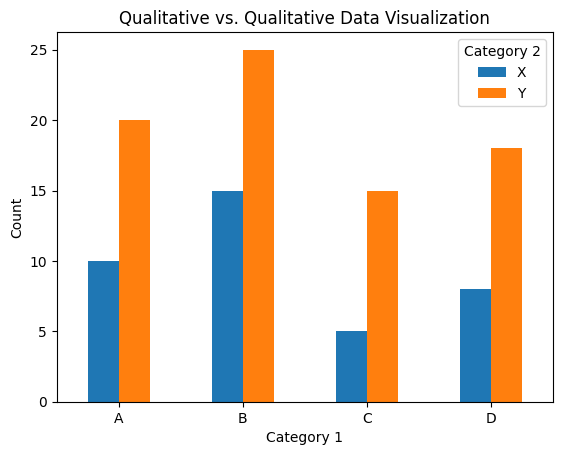

In [134]:
data = {
    'Category 1': ['A', 'A', 'B', 'B', 'C', 'C', 'D', 'D'],
    'Category 2': ['X', 'Y', 'X', 'Y', 'X', 'Y', 'X', 'Y'],
    'Count': [10, 20, 15, 25, 5, 15, 8, 18]
}


df = pd.DataFrame(data)


pivot_df = df.pivot(index='Category 1', columns='Category 2', values='Count')


pivot_df.plot(kind='bar', stacked=False)

plt.title('Qualitative vs. Qualitative Data Visualization')
plt.xlabel('Category 1')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

<h1>Line PLOT</h1>

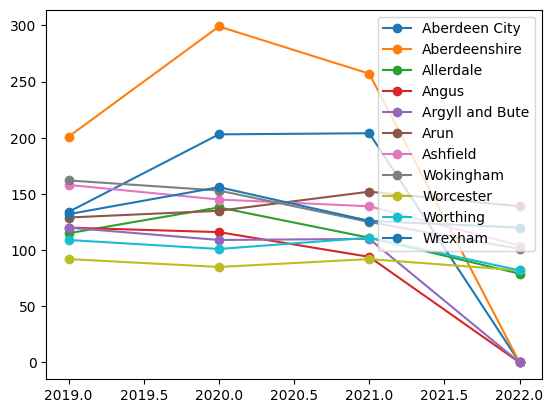

In [135]:
year_area = acci.groupby(['District Area','Year']).size().reset_index(name='Accident_Count')

easy_df = year_area.pivot(index='Year', columns='District Area', values='Accident_Count')

#line plot
#(x, y)

plt.plot(easy_df.index, easy_df['Aberdeen City'], label='Aberdeen City', marker='o')
plt.plot(easy_df.index, easy_df['Aberdeenshire'], label='Aberdeenshire', marker='o')
plt.plot(easy_df.index, easy_df['Allerdale'], label='Allerdale', marker='o')
plt.plot(easy_df.index, easy_df['Angus'], label='Angus', marker='o')
plt.plot(easy_df.index, easy_df['Argyll and Bute'], label='Argyll and Bute', marker='o')
plt.plot(easy_df.index, easy_df['Arun'], label='Arun', marker='o')
plt.plot(easy_df.index, easy_df['Ashfield'], label='Ashfield', marker='o')
plt.plot(easy_df.index, easy_df['Wokingham'], label='Wokingham', marker='o')
plt.plot(easy_df.index, easy_df['Worcester'], label='Worcester', marker='o')
plt.plot(easy_df.index, easy_df['Worthing'], label='Worthing', marker='o')
plt.plot(easy_df.index, easy_df['Wrexham'], label='Wrexham', marker='o')


plt.legend()
plt.show()

In [136]:
easy_df

District Area,Aberdeen City,Aberdeenshire,Adur,Allerdale,Alnwick,Amber Valley,Angus,Argyll and Bute,Arun,Ashfield,...,Wokingham,Wolverhampton,Worcester,Worthing,Wrexham,Wychavon,Wycombe,Wyre,Wyre Forest,York
Year,,,,,,,,,,,,,,,,,,,,,
2019.0,134,201,75,115,52,146,120,120,129,158,...,162,273,92,109,132,135,170,127,97,194
2020.0,203,299,78,138,46,137,116,109,135,145,...,153,259,85,101,156,177,190,124,95,172
2021.0,204,257,66,111,9,129,94,110,152,139,...,125,255,92,111,126,138,171,130,96,215
2022.0,0,0,46,79,0,107,0,0,139,104,...,101,214,82,82,120,101,164,115,93,171


<h1>Heatmap</h1>

<h1>Visualizing Correlation</h1>

<function matplotlib.pyplot.show(close=None, block=None)>

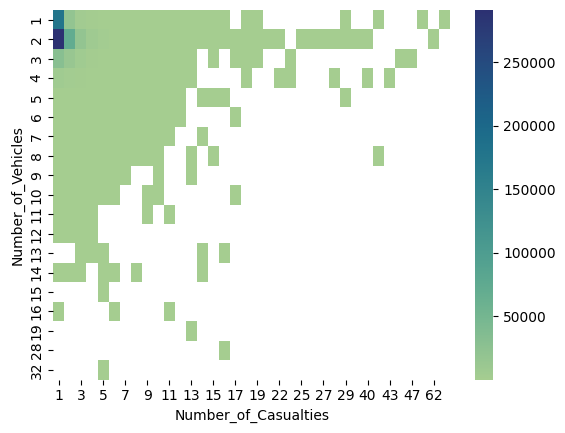

In [137]:
cas_veh = acci.groupby(['Number_of_Vehicles', 'Number_of_Casualties']).size().unstack()

sns.heatmap(cas_veh, cmap='crest')
plt.show

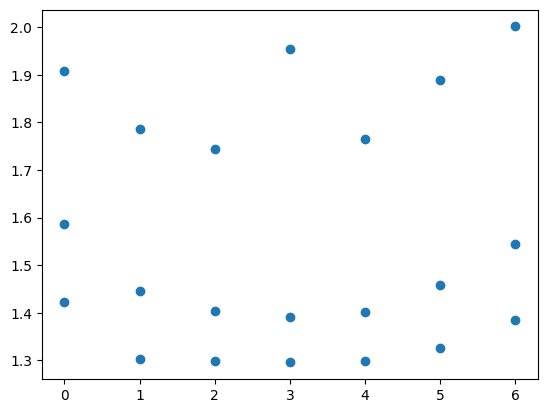

In [138]:
cas_sev = acci.groupby(['Accident_Severity', 'DayOfWeek'])['Number_of_Casualties'].mean().reset_index(name='average_accident')

plt.scatter(cas_sev['DayOfWeek'], cas_sev['average_accident'])
plt.show()